In [24]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# 3 Tasks - To - Do:

# 3.1
# Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

# 1. Data Exploration and Understanding:

# Dataset Overview:
# 1. Load the dataset and display the first 10 rows.
file_path = "datasets/WHR-2024-5CS037.csv"
df = pd.read_csv(file_path)
print("\nFirst 10 rows of the dataset:")
print(df.head(10))

# 2. Identify the number of rows and columns in the dataset.
print("\nNumber of rows and columns:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# 3. List all the columns and their data types.
print("\nColumns and their data types:")
print(df.dtypes)


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3        

In [26]:
# Basic Statistics:
# 1. Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print("Statistics for the score column:")
print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {std_score}")

# 2. Identify the country with the highest and lowest happiness scores.
country_highest_score = df.loc[df['score'].idxmax(), 'Country name']
country_lowest_score = df.loc[df['score'].idxmin(), 'Country name']

print("\nCountries with the highest and lowest happiness scores:")
print(f"Highest Score: {country_highest_score}")
print(f"Lowest Score: {country_lowest_score}")

Statistics for the score column:
Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442993

Countries with the highest and lowest happiness scores:
Highest Score: Finland
Lowest Score: Afghanistan


In [45]:
# Missing Values:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
print("Missing Values in the Dataset:")
missing_values = df.isnull().sum()

print(missing_values)

Missing Values in the Dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
Happiness Category              0
dtype: int64


In [28]:
# Filtering and Sorting:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]

print("Filtered Dataset (Score > 7.5):")
print(filtered_df)

# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

print("\nTop 10 countries sorted by GDP per Capita in descending order:")
print(sorted_df.head(10))

Filtered Dataset (Score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

Top 10 countries sorted by GDP per Capita in descending order:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.88

In [29]:
# Adding New Columns:
# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
#    Low − (Score < 4)
#    Medium − (4 ≤ Score ≤ 6)
#    High − (Score > 6)

def happiness_category(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

df['Happiness Category'] = df['score'].apply(happiness_category)

print("\nDataset with Happiness Category:")
print(df[['Country name', 'score', 'Happiness Category']].head())


Dataset with Happiness Category:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


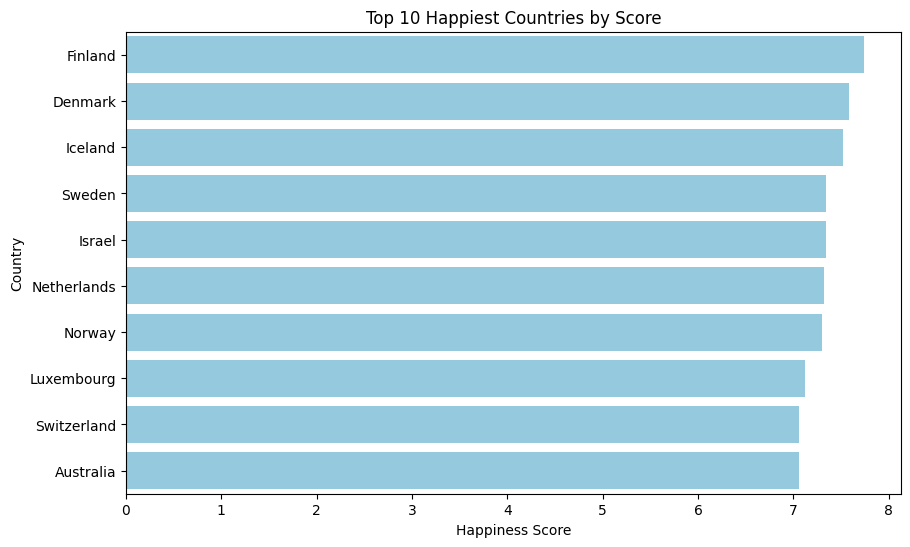

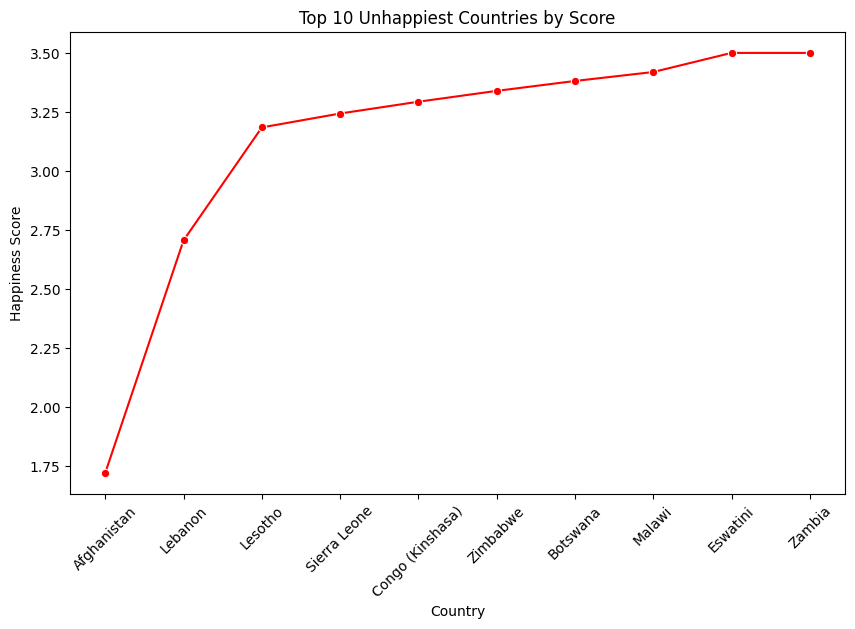

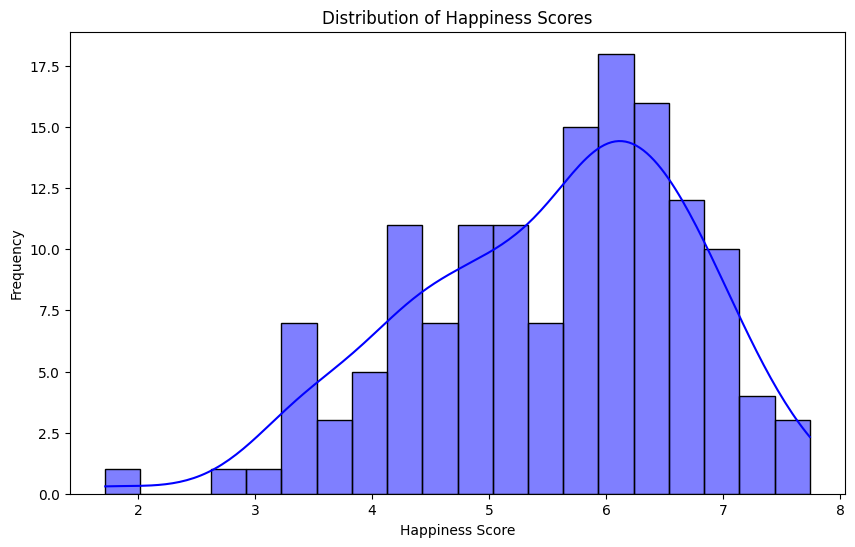

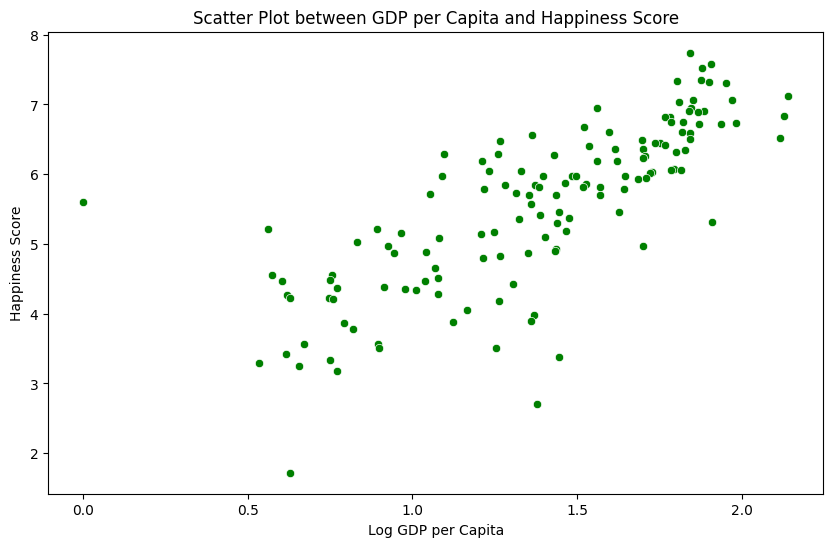

In [47]:
# Data Visualizations:

# 1. Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, color='skyblue')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

# 2. Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest = df.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

# 3. Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='green')
plt.title('Scatter Plot between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [31]:
# 3.2 Problem - 2 - Some Advance Data Exploration Task:

# Task - 1 - Setup Task - Preparing the South-Asia Dataset:

# Step 1: Define the countries in South Asia
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", 
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset to include only South Asian countries
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe as a separate CSV file
south_asian_df.to_csv('south_asian_happiness_data.csv', index=False)

# Displaying the first 5 rows of the filtered data for verification
print(south_asian_df.head())

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

C:\Users\Kritish\AppData\Local\Temp\ipykernel_18276\3074444623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_df.loc[:, 'Composite Score'] = (0.40 * south_asian_df['Log GDP per capita'] +


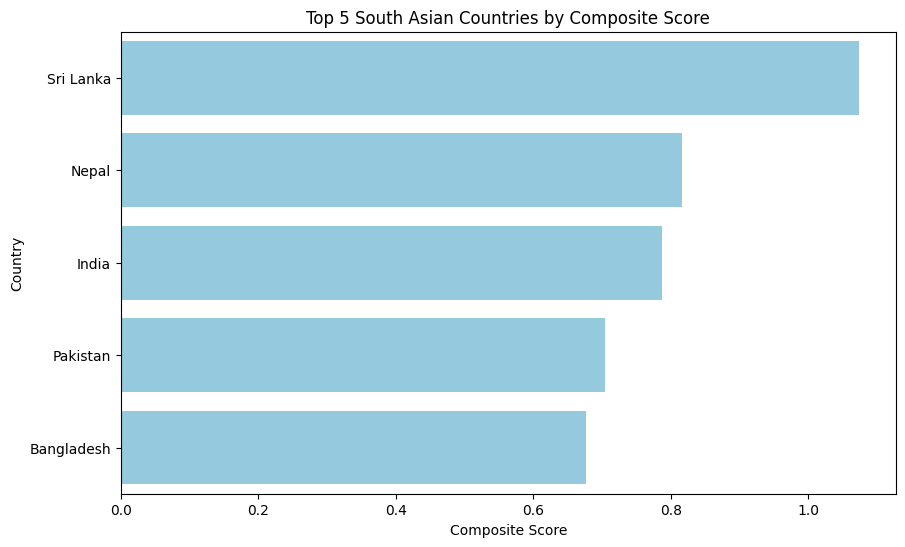

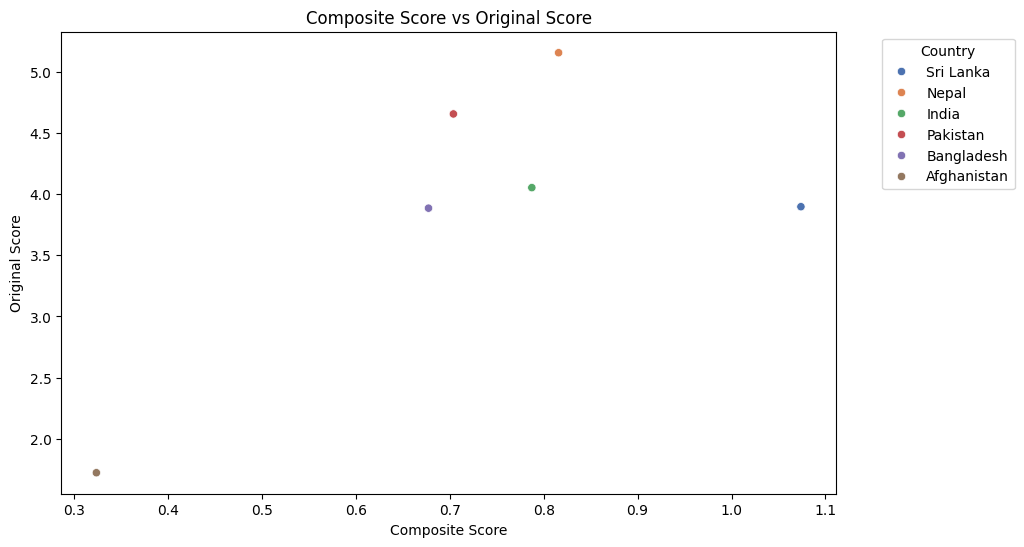

In [32]:
# Task - 2 - Composite Score Ranking

# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
south_asian_df.loc[:, 'Composite Score'] = (0.40 * south_asian_df['Log GDP per capita'] +
                                            0.30 * south_asian_df['Social support'] +
                                            0.30 * south_asian_df['Healthy life expectancy'])

# 2. Rank the South Asian countries based on the Composite Score in descending order
south_asian_df = south_asian_df.sort_values(by='Composite Score', ascending=False)

# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score
top_5_composite_score = south_asian_df.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite_score, color='skyblue')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.
# We can visualize the original score vs. the composite score for the top 5 countries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asian_df, x='Composite Score', y='score', hue='Country name', palette='deep')
plt.title('Composite Score vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

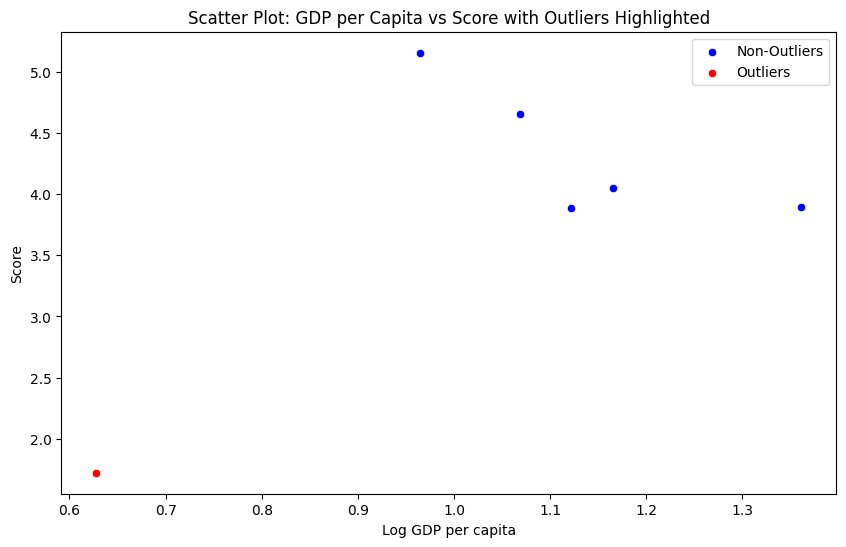

In [33]:
# Task - 3 - Outlier Detection

# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
Q1_score = south_asian_df['score'].quantile(0.25)
Q3_score = south_asian_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# 2. Define outliers using the 1.5 × IQR rule
score_outliers = south_asian_df[(south_asian_df['score'] < (Q1_score - 1.5 * IQR_score)) |
                                (south_asian_df['score'] > (Q3_score + 1.5 * IQR_score))]

gdp_outliers = south_asian_df[(south_asian_df['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) |
                               (south_asian_df['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))]

outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_df, color='blue', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Scatter Plot: GDP per Capita vs Score with Outliers Highlighted')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()

Pearson correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


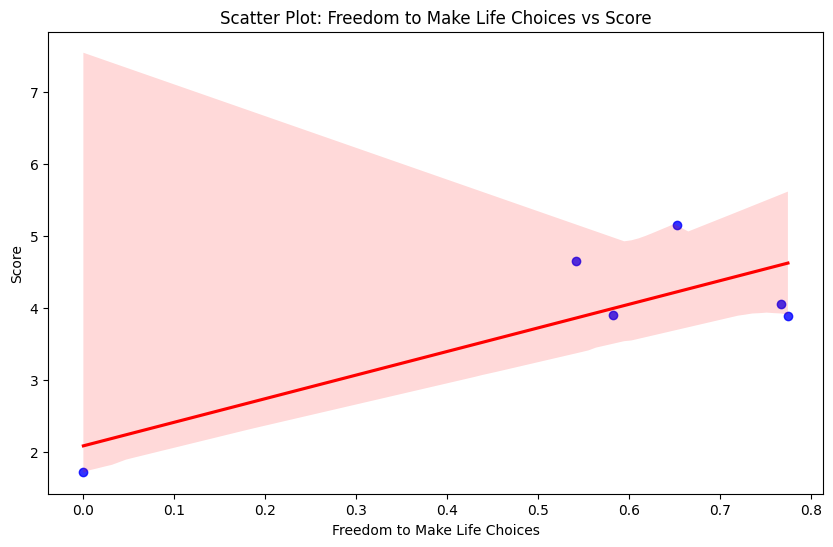

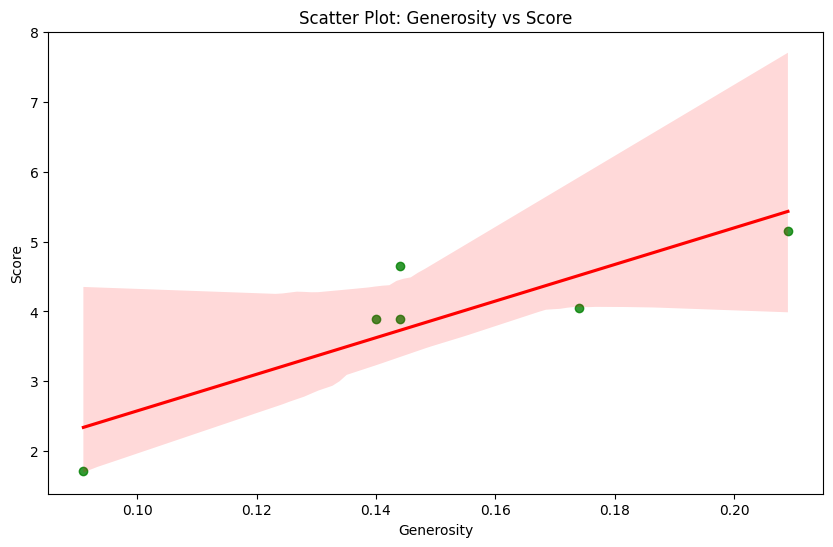

In [34]:
# Task - 4 - Exploring Trends Across Metrics

# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation(Pearson correlation)
# with the Score for South Asian countries.
freedom_corr = south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])
generosity_corr = south_asian_df['Generosity'].corr(south_asian_df['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {freedom_corr}")
print(f"Pearson correlation between Generosity and Score: {generosity_corr}")

# 2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Scatter Plot: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

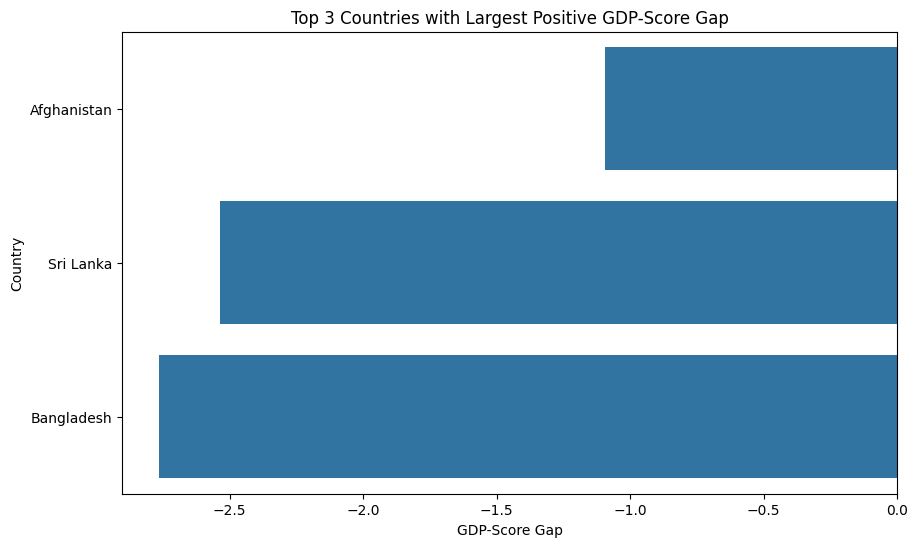

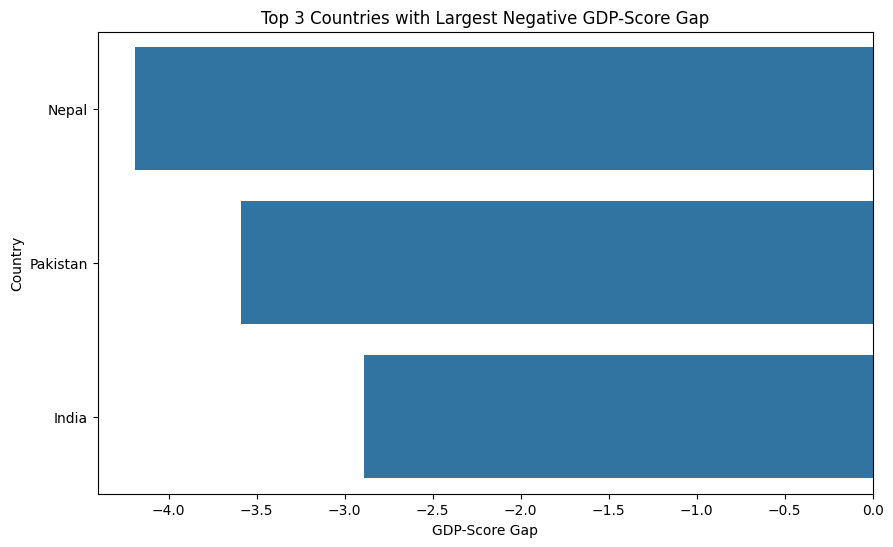

In [35]:
# Task - 5 - Gap Analysis

# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
# Ascending order
ascending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True)

# Descending order
descending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False)

# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_positive_gap = descending_gap.head(3)
top_3_negative_gap = ascending_gap.head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive_gap)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative_gap)
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

In [36]:
# 3.3 Problem - 3 - Comparative Analysis:

# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

# Tasks:
# Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
# middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
#                           "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", 
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]

middle_east_df.to_csv("middle_east_data.csv", index=False)

print(middle_east_df.head())

            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual Happiness Category  
4                       0.193                2.298            

In [37]:
# 1. Descriptive Statistics:

# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
south_asia_mean = south_asian_df['score'].mean()
south_asia_std = south_asian_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")

# • Which region has higher happiness Scores on average?
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has a higher average happiness score.


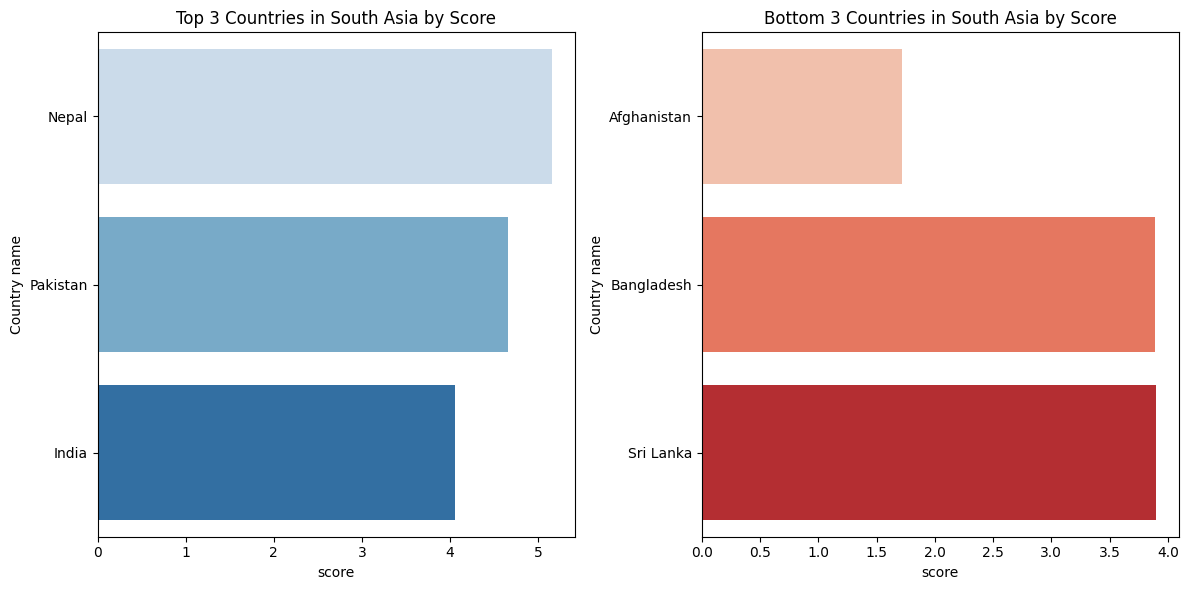

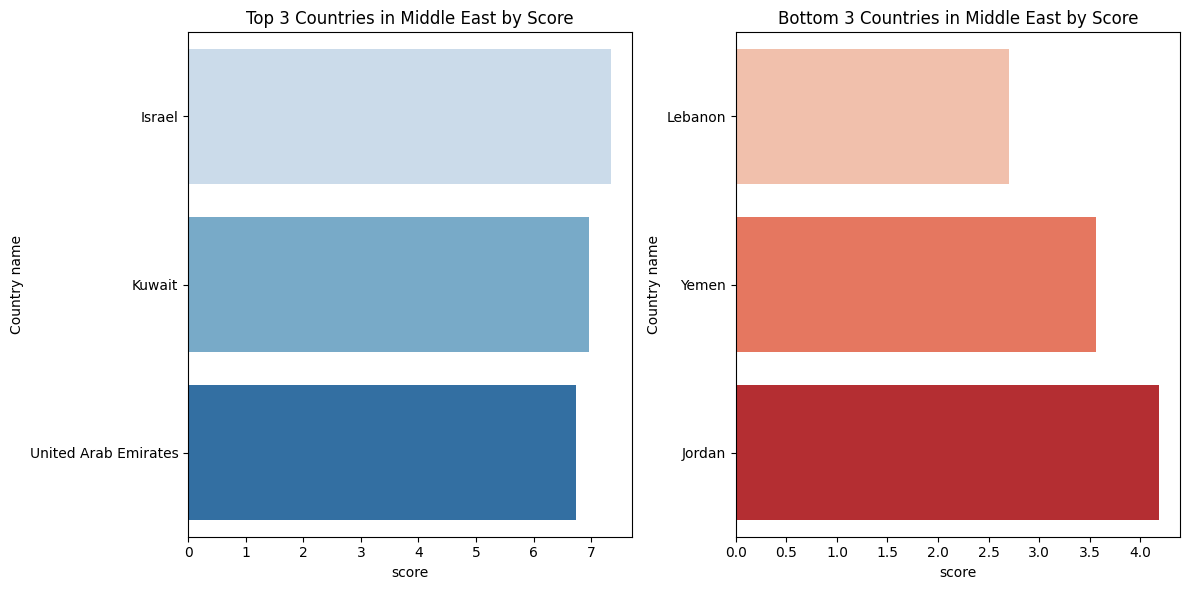

In [38]:
# 2. Top and Bottom Performers:

# • Identify the top 3 and bottom 3 countries in each region based on the score.
south_asia_top_3 = south_asian_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
south_asia_bottom_3 = south_asian_df[['Country name', 'score']].sort_values(by='score').head(3)

middle_east_top_3 = middle_east_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
middle_east_bottom_3 = middle_east_df[['Country name', 'score']].sort_values(by='score').head(3)

# • Plot bar charts comparing these charts.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=south_asia_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in South Asia by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=south_asia_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in South Asia by Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=middle_east_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in Middle East by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=middle_east_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()

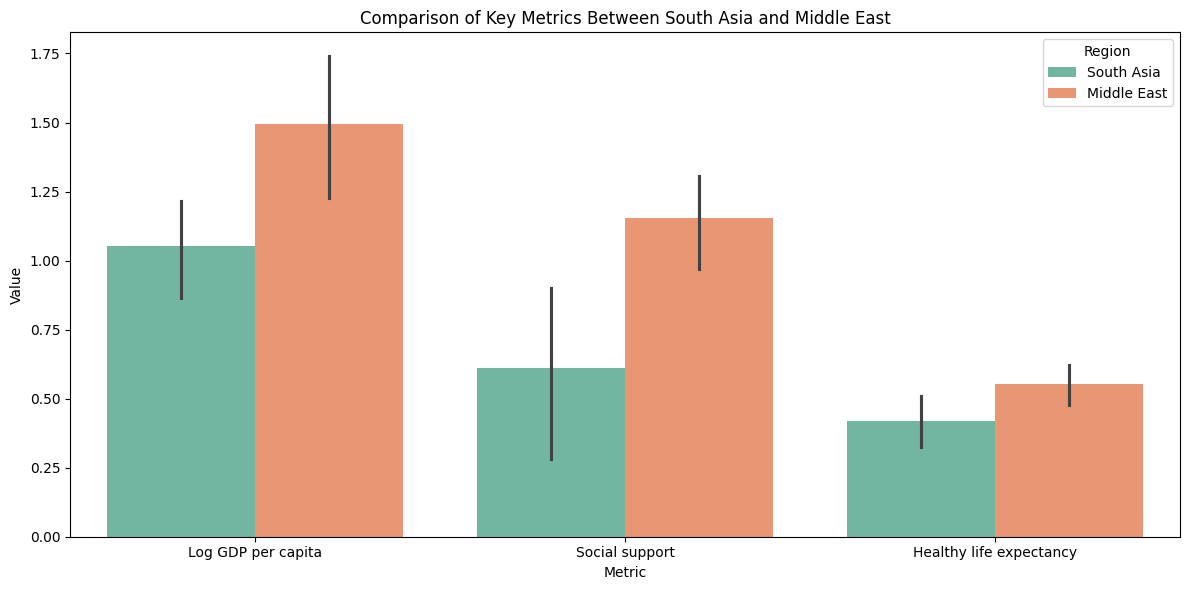

In [39]:
# 3. Metric Comparisons:

# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_metrics = south_asian_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
middle_east_metrics = middle_east_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

south_asia_metrics['Region'] = 'South Asia'
middle_east_metrics['Region'] = 'Middle East'

comparison_df = pd.concat([south_asia_metrics, middle_east_metrics]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='Set2')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [40]:
# 4. Happiness Disparity:

# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
south_asia_score_range = south_asian_df['score'].max() - south_asian_df['score'].min()
middle_east_score_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = south_asian_df['score'].std() / south_asian_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia Score Range: {south_asia_score_range}")
print(f"Middle East Score Range: {middle_east_score_range}")
print(f"South Asia Coefficient of Variation (CV): {south_asia_cv}")
print(f"Middle East Coefficient of Variation (CV): {middle_east_cv}")

South Asia Score Range: 3.4370000000000003
Middle East Score Range: 4.634
South Asia Coefficient of Variation (CV): 0.30214828833374263
Middle East Coefficient of Variation (CV): 0.28938880812119405


South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


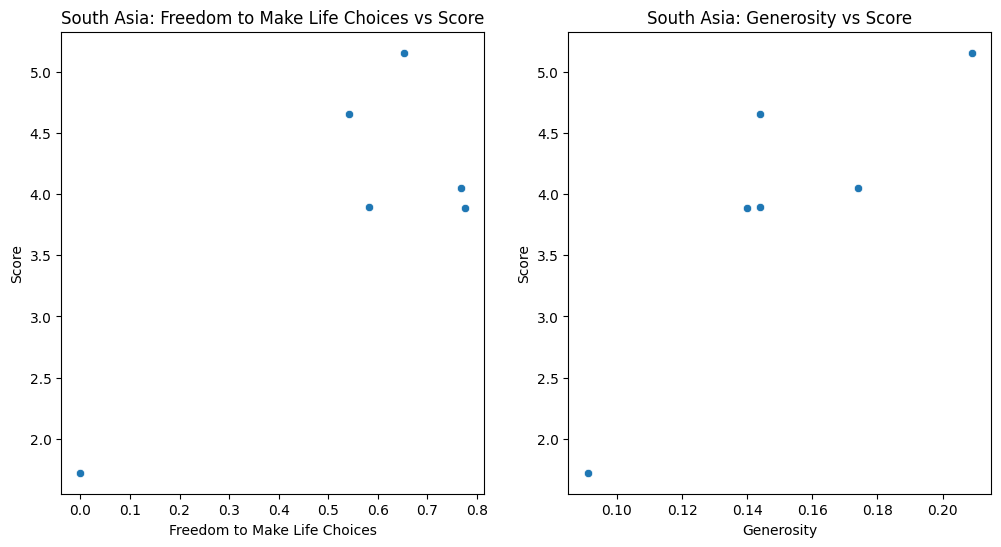

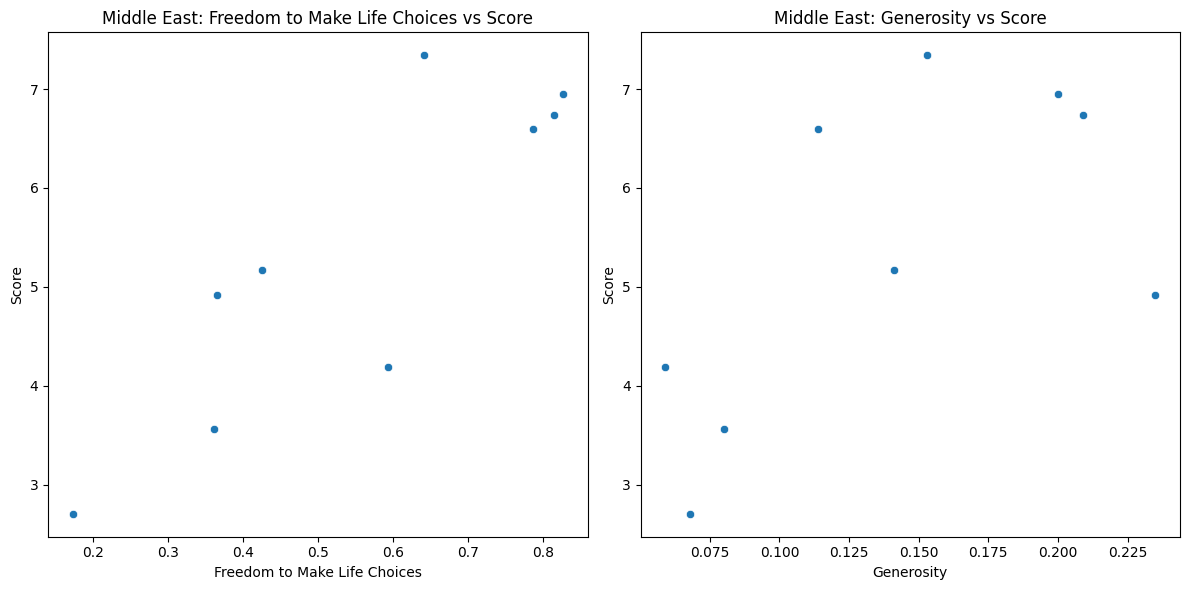

In [41]:
# 5. Correlation Analysis:

# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
south_asia_corr = south_asian_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("South Asia Correlation Matrix:")
print(south_asia_corr)
print("\nMiddle East Correlation Matrix:")
print(middle_east_corr)

# • Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_df)
plt.title('South Asia: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asian_df)
plt.title('South Asia: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

# Middle East
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df)
plt.title('Middle East: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_east_df)
plt.title('Middle East: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

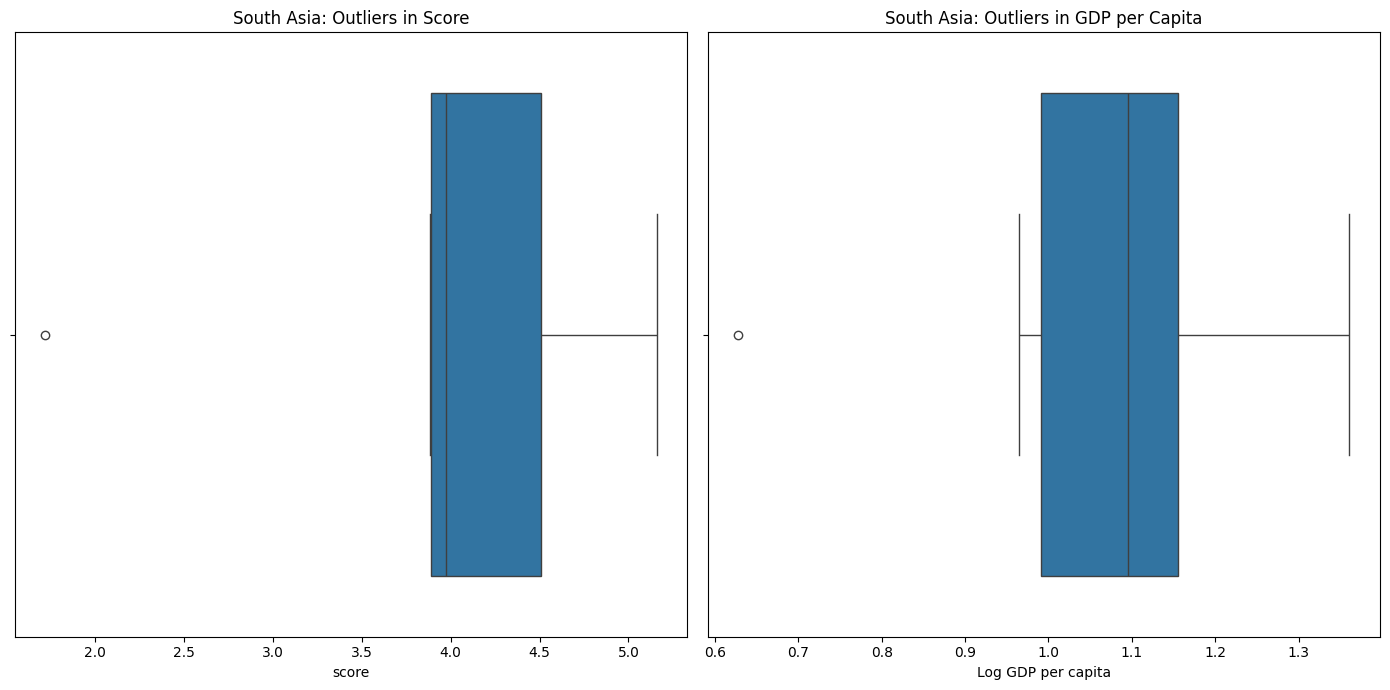

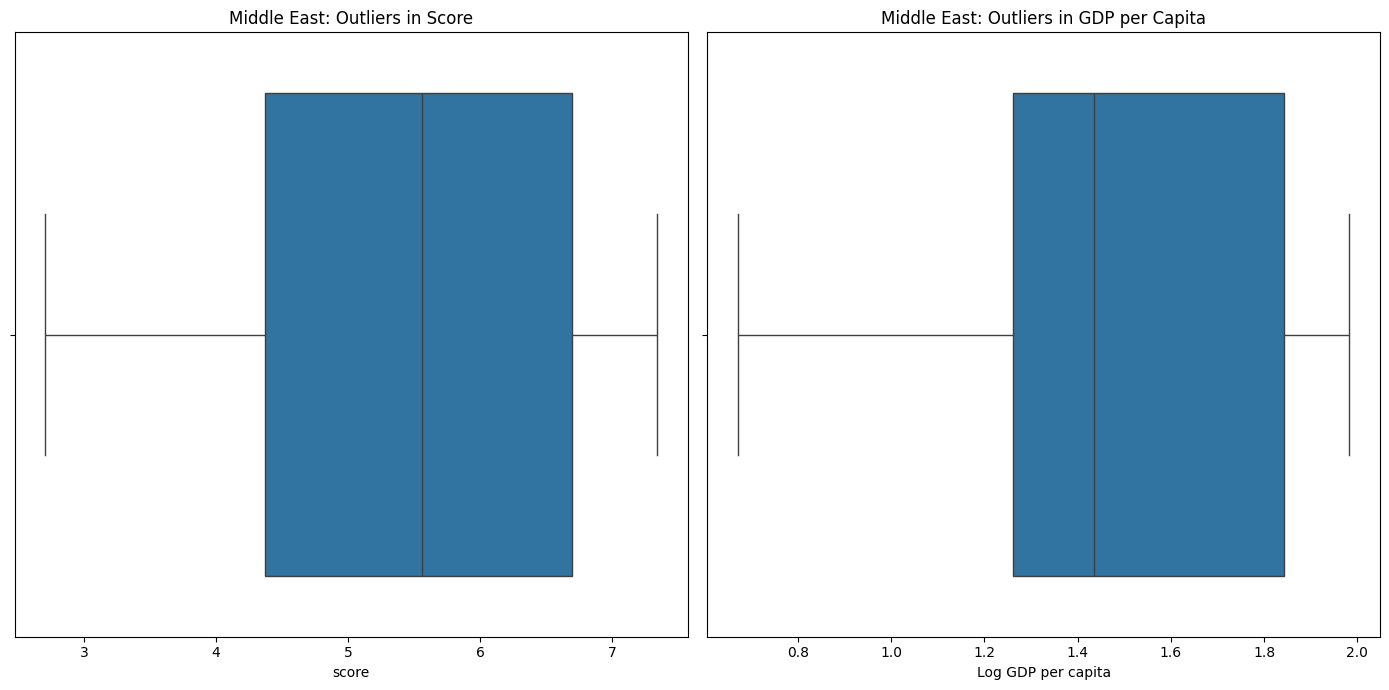

,Country name,Log GDP per capita


In [42]:
# 6. Outlier Detection:

# • Identify outlier countries in both regions based on Score and GDP per Capita.
south_asia_outliers_score = south_asian_df[(south_asian_df['score'] < south_asian_df['score'].quantile(0.25) - 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25))) | 
                                            (south_asian_df['score'] > south_asian_df['score'].quantile(0.75) + 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25)))]

south_asia_outliers_gdp = south_asian_df[(south_asian_df['Log GDP per capita'] < south_asian_df['Log GDP per capita'].quantile(0.25) - 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25))) | 
                                           (south_asian_df['Log GDP per capita'] > south_asian_df['Log GDP per capita'].quantile(0.75) + 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25)))]

middle_east_outliers_score = middle_east_df[(middle_east_df['score'] < middle_east_df['score'].quantile(0.25) - 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25))) | 
                                             (middle_east_df['score'] > middle_east_df['score'].quantile(0.75) + 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25)))]

middle_east_outliers_gdp = middle_east_df[(middle_east_df['Log GDP per capita'] < middle_east_df['Log GDP per capita'].quantile(0.25) - 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25))) | 
                                            (middle_east_df['Log GDP per capita'] > middle_east_df['Log GDP per capita'].quantile(0.75) + 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25)))]

# • Plot these outliers and discuss their implications.
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=south_asian_df['score'])
plt.title('South Asia: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=south_asian_df['Log GDP per capita'])
plt.title('South Asia: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=middle_east_df['score'])
plt.title('Middle East: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=middle_east_df['Log GDP per capita'])
plt.title('Middle East: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

south_asia_outliers_score[['Country name', 'score']]
south_asia_outliers_gdp[['Country name', 'Log GDP per capita']]
middle_east_outliers_score[['Country name', 'score']]
middle_east_outliers_gdp[['Country name', 'Log GDP per capita']]

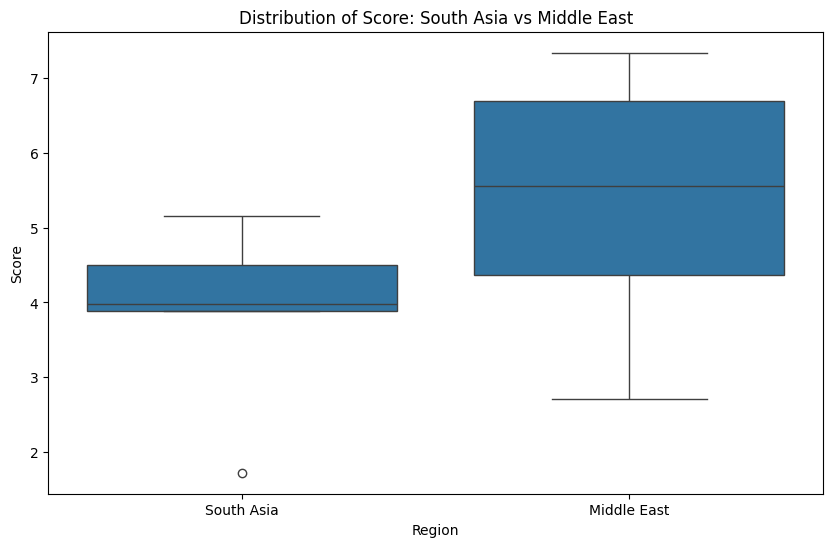

In [43]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asian_df.assign(Region='South Asia'), middle_east_df.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()